**Exploratory Data Analysis**

M5 Forecasting - Accuracy, Estimate the unit sales of Walmart retail goods

##Importing Libraries

In [1]:
#Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pywt
import plotly.express as px

##Importing Dataset

In [2]:
#Importing the dataset
DIR = '/content/drive/Shared drives/CMPE-256/Raw Data'
df_calendar = pd.read_csv(DIR+'/calendar.csv')
df_sales_train_evaluation = pd.read_csv(DIR+'/sales_train_evaluation.csv')
df_sales_train_validation = pd.read_csv(DIR+'/sales_train_validation.csv')
df_sell_prices = pd.read_csv(DIR+'/sell_prices.csv')

##Demand Vs Sell Price

Day wise

In [3]:
sales_train_validation_melt = pd.melt(df_sales_train_validation, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='day', value_name='demand')

In [4]:
sales_CA_1 = sales_train_validation_melt[sales_train_validation_melt.store_id == "CA_1"]
new_CA_1 = pd.merge(sales_CA_1, df_calendar, left_on="day", right_on="d", how="left")
new_CA_1 = pd.merge(new_CA_1, df_sell_prices, left_on=["store_id", "item_id", "wm_yr_wk"],right_on=["store_id", "item_id", "wm_yr_wk"], how="left")
new_CA_1["day_int"] = new_CA_1.day.apply(lambda x: int(x.split("_")[-1]))

In [5]:
day_sum = new_CA_1.groupby("day_int")[["sell_price", "demand"]].agg("sum").reset_index()

In [6]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(x=day_sum.day_int, 
                         y=day_sum.demand,
                         #showlegend=False,
                         mode="lines",
                         name="demand",
                         #marker=dict(color="mediumseagreen"),
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=day_sum.day_int, 
                         y=day_sum.sell_price,
                         #showlegend=False,
                         mode="lines",
                         name="sell_price",
                         #marker=dict(color="mediumseagreen")
                         ),
             
              row=2,col=1           
              )

fig.update_layout(height=1000, title_text="Demand  and Sell_price")
fig.show()

Weekend Vs Weekday

In [7]:
# For each item week_days vs week_ends over days sell_price and demand

week_end = new_CA_1[new_CA_1.weekday == "Sunday"]
week_day = new_CA_1[new_CA_1.weekday != "Sunday"]

week_end = week_end.groupby("item_id")[["demand", "sell_price"]].agg(["mean", "max"]).reset_index()
week_end.columns = ['_'.join(col).strip() for col in week_end.columns.values]

week_day = week_day.groupby("item_id")[["demand", "sell_price"]].agg(["mean", "max"]).reset_index()
week_day.columns = ['_'.join(col).strip() for col in week_day.columns.values]

In [8]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=week_end["item_id_"],
                         y=week_end["demand_mean"],
                         mode="lines",
                         name="week_day"

))

fig.add_trace(go.Scatter(x=week_end["item_id_"],
                         y=week_day["demand_mean"],
                         mode="lines",
                         name="normal_day"

))

fig.update_layout(height=500, title_text="Demand")
fig.show()

Event Days

In [9]:
#Event Days
events = new_CA_1[~new_CA_1.event_name_1.isna()]
events = events.groupby("event_name_1")[["demand", "sell_price"]].agg(["mean", "max"]).reset_index()
events.columns = ['_'.join(col).strip() for col in events.columns.values]

In [10]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=events["event_name_1_"],
                         y=events["demand_mean"],
                         mode="lines",
                         name="week_day"
))

fig.update_layout(height=500, title_text="Demand")
fig.show()

In [11]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=events["event_name_1_"],
                         y=events["sell_price_mean"],
                         mode="lines",
                         name="week_day"

))

fig.update_layout(height=500, title_text="Sell_price")
fig.show()

##Category Wise

In [12]:
## Number of items contain each Category

def n_unique(series):
    return series.nunique()

Category_count = new_CA_1.groupby("cat_id")["item_id"].agg(n_unique).reset_index()

fig = px.bar(Category_count, y="item_id", x="cat_id", color="cat_id", title="Category Item Count")

fig.update_layout(height=500, width=600)
fig.show()

In [13]:
## For each category mean of demand and sell_price

Category = new_CA_1.groupby(["day_int","cat_id"])[["demand", "sell_price"]].agg(["mean", "max"]).reset_index()
Category.columns = ['_'.join(col).strip() for col in Category.columns.values]

FOODS = Category[Category.cat_id_ == "FOODS"]
HOBBIES = Category[Category.cat_id_ == "HOBBIES"]
HOUSEHOLD = Category[Category.cat_id_ == "HOUSEHOLD"]

fig = make_subplots(rows=1, cols=1)


fig.add_trace(go.Scatter(x=FOODS["day_int_"], 
                         y=FOODS["demand_mean"],
                         #showlegend=Ture,
                         mode="lines",
                         name="FOODS",
                         #marker=dict(color="mediumseagreen")
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=HOBBIES["day_int_"], 
                         y=HOBBIES["demand_mean"],
                         #showlegend=Ture,
                         mode="lines",
                         name="HOBBIES",
                         #marker=dict(color="yellow")
                         ),
             
              row=1,col=1           
              )

fig.add_trace(go.Scatter(x=HOUSEHOLD["day_int_"], 
                         y=HOUSEHOLD["demand_mean"],
                         #showlegend=Ture,
                         mode="lines",
                         name="HOUSEHOLD",
                         #marker=dict(color="blue")
                         ),
             
              row=1,col=1           
              )

fig.update_layout(height=500, title_text="Demand Mean Over Category by day-by-day")
fig.show()

In [14]:
fig = make_subplots(rows=1, cols=1)


fig.add_trace(go.Scatter(x=FOODS["day_int_"], 
                         y=FOODS["sell_price_mean"],
                         #showlegend=Ture,
                         mode="lines",
                         name="FOODS",
                         #marker=dict(color="mediumseagreen")
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=HOBBIES["day_int_"], 
                         y=HOBBIES["sell_price_mean"],
                         #showlegend=Ture,
                         mode="lines",
                         name="HOBBIES",
                         #marker=dict(color="yellow")
                         ),
             
              row=1,col=1           
              )

fig.add_trace(go.Scatter(x=HOUSEHOLD["day_int_"], 
                         y=HOUSEHOLD["sell_price_mean"],
                         #showlegend=Ture,
                         mode="lines",
                         name="HOUSEHOLD",
                         #marker=dict(color="blue")
                         ),
             
              row=1,col=1           
              )

fig.update_layout(height=500, title_text="Sell_price Mean Over Category by day-by-day")
fig.show()

##Sales

In [15]:
ids = sorted(list(set(df_sales_train_validation['id'])))
d_cols = [c for c in df_sales_train_validation.columns if 'd_' in c]
x_1 = df_sales_train_validation.loc[df_sales_train_validation['id'] == ids[2]].set_index('id')[d_cols].values[0]
x_2 = df_sales_train_validation.loc[df_sales_train_validation['id'] == ids[1]].set_index('id')[d_cols].values[0]
x_3 = df_sales_train_validation.loc[df_sales_train_validation['id'] == ids[17]].set_index('id')[d_cols].values[0]

fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_1)), y=x_1, showlegend=False,
                    mode='lines', name="First sample",
                         marker=dict(color="mediumseagreen")),
             row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_2)), y=x_2, showlegend=False,
                    mode='lines', name="Second sample",
                         marker=dict(color="violet")),
             row=2, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_3)), y=x_3, showlegend=False,
                    mode='lines', name="Third sample",
                         marker=dict(color="dodgerblue")),
             row=3, col=1)

fig.update_layout(height=1200, width=800, title_text="Sample sales")
fig.show()

In [16]:
ids = sorted(list(set(df_sales_train_validation['id'])))
d_cols = [c for c in df_sales_train_validation.columns if 'd_' in c]
x_1 = df_sales_train_validation.loc[df_sales_train_validation['id'] == ids[0]].set_index('id')[d_cols].values[0][:90]
x_2 = df_sales_train_validation.loc[df_sales_train_validation['id'] == ids[4]].set_index('id')[d_cols].values[0][1300:1400]
x_3 = df_sales_train_validation.loc[df_sales_train_validation['id'] == ids[65]].set_index('id')[d_cols].values[0][350:450]
fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_1)), y=x_1, showlegend=False,
                    mode='lines+markers', name="First sample",
                         marker=dict(color="mediumseagreen")),
             row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_2)), y=x_2, showlegend=False,
                    mode='lines+markers', name="Second sample",
                         marker=dict(color="violet")),
             row=2, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_3)), y=x_3, showlegend=False,
                    mode='lines+markers', name="Third sample",
                         marker=dict(color="dodgerblue")),
             row=3, col=1)

fig.update_layout(height=1200, width=800, title_text="Sample sales snippets")
fig.show()

In [17]:
#Denoising

def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def denoise_signal(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * maddest(coeff[-level])

    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

    return pywt.waverec(coeff, wavelet, mode='per')

In [18]:
y_w1 = denoise_signal(x_1)
y_w2 = denoise_signal(x_2)
y_w3 = denoise_signal(x_3)


fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), mode='lines+markers', y=x_1, marker=dict(color="mediumaquamarine"), showlegend=False,
               name="Original signal"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), y=y_w1, mode='lines', marker=dict(color="darkgreen"), showlegend=False,
               name="Denoised signal"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), mode='lines+markers', y=x_2, marker=dict(color="thistle"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), y=y_w2, mode='lines', marker=dict(color="purple"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), mode='lines+markers', y=x_3, marker=dict(color="lightskyblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), y=y_w3, mode='lines', marker=dict(color="navy"), showlegend=False),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Original (pale) vs. Denoised (dark) sales")
fig.show()

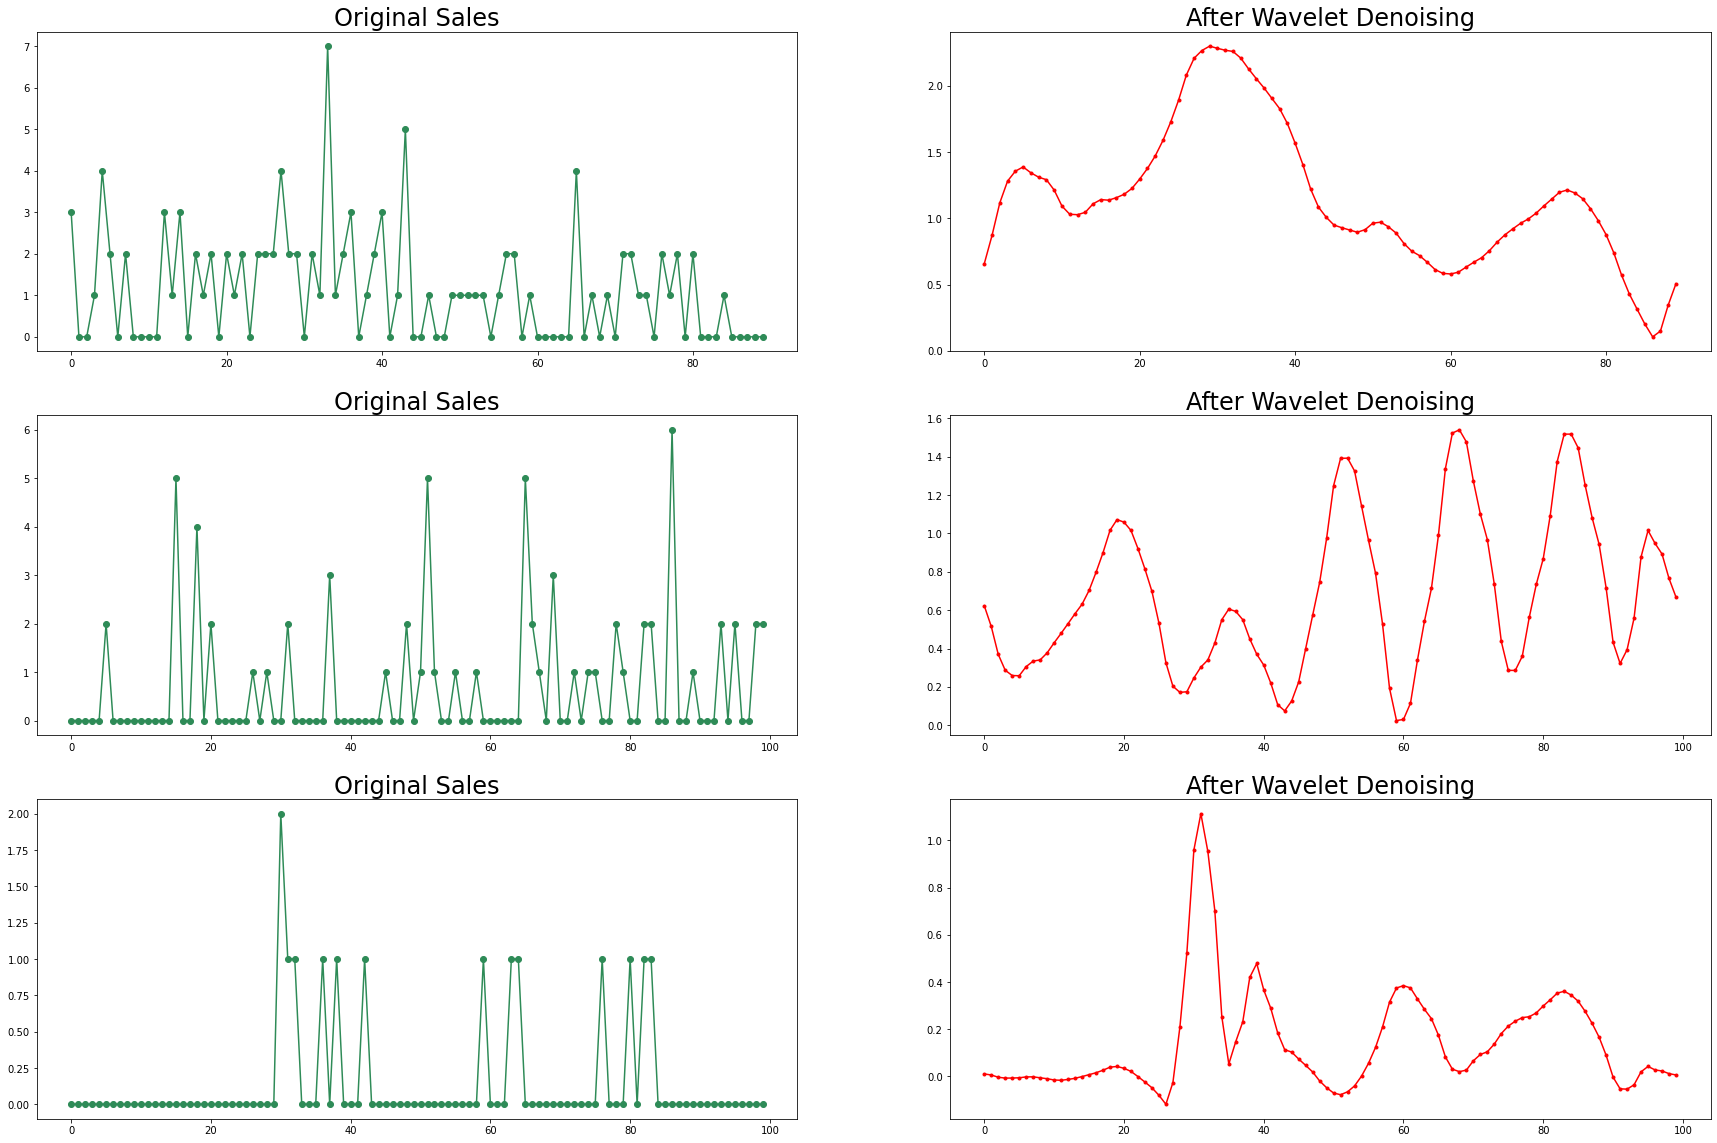

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))

ax[0, 0].plot(x_1, color='seagreen', marker='o') 
ax[0, 0].set_title('Original Sales', fontsize=24)
ax[0, 1].plot(y_w1, color='red', marker='.') 
ax[0, 1].set_title('After Wavelet Denoising', fontsize=24)

ax[1, 0].plot(x_2, color='seagreen', marker='o') 
ax[1, 0].set_title('Original Sales', fontsize=24)
ax[1, 1].plot(y_w2, color='red', marker='.') 
ax[1, 1].set_title('After Wavelet Denoising', fontsize=24)

ax[2, 0].plot(x_3, color='seagreen', marker='o') 
ax[2, 0].set_title('Original Sales', fontsize=24)
ax[2, 1].plot(y_w3, color='red', marker='.') 
ax[2, 1].set_title('After Wavelet Denoising', fontsize=24)

plt.show()

In [20]:
def average_smoothing(signal, kernel_size=3, stride=1):
    sample = []
    start = 0
    end = kernel_size
    while end <= len(signal):
        start = start + stride
        end = end + stride
        sample.extend(np.ones(end - start)*np.mean(signal[start:end]))
    return np.array(sample)


In [21]:
y_a1 = average_smoothing(x_1)
y_a2 = average_smoothing(x_2)
y_a3 = average_smoothing(x_3)

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), mode='lines+markers', y=x_1, marker=dict(color="lightskyblue"), showlegend=False,
               name="Original sales"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), y=y_a1, mode='lines', marker=dict(color="navy"), showlegend=False,
               name="Denoised sales"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), mode='lines+markers', y=x_2, marker=dict(color="thistle"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), y=y_a2, mode='lines', marker=dict(color="indigo"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), mode='lines+markers', y=x_3, marker=dict(color="mediumaquamarine"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), y=y_a3, mode='lines', marker=dict(color="darkgreen"), showlegend=False),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Original (pale) vs. Denoised (dark) signals")
fig.show()

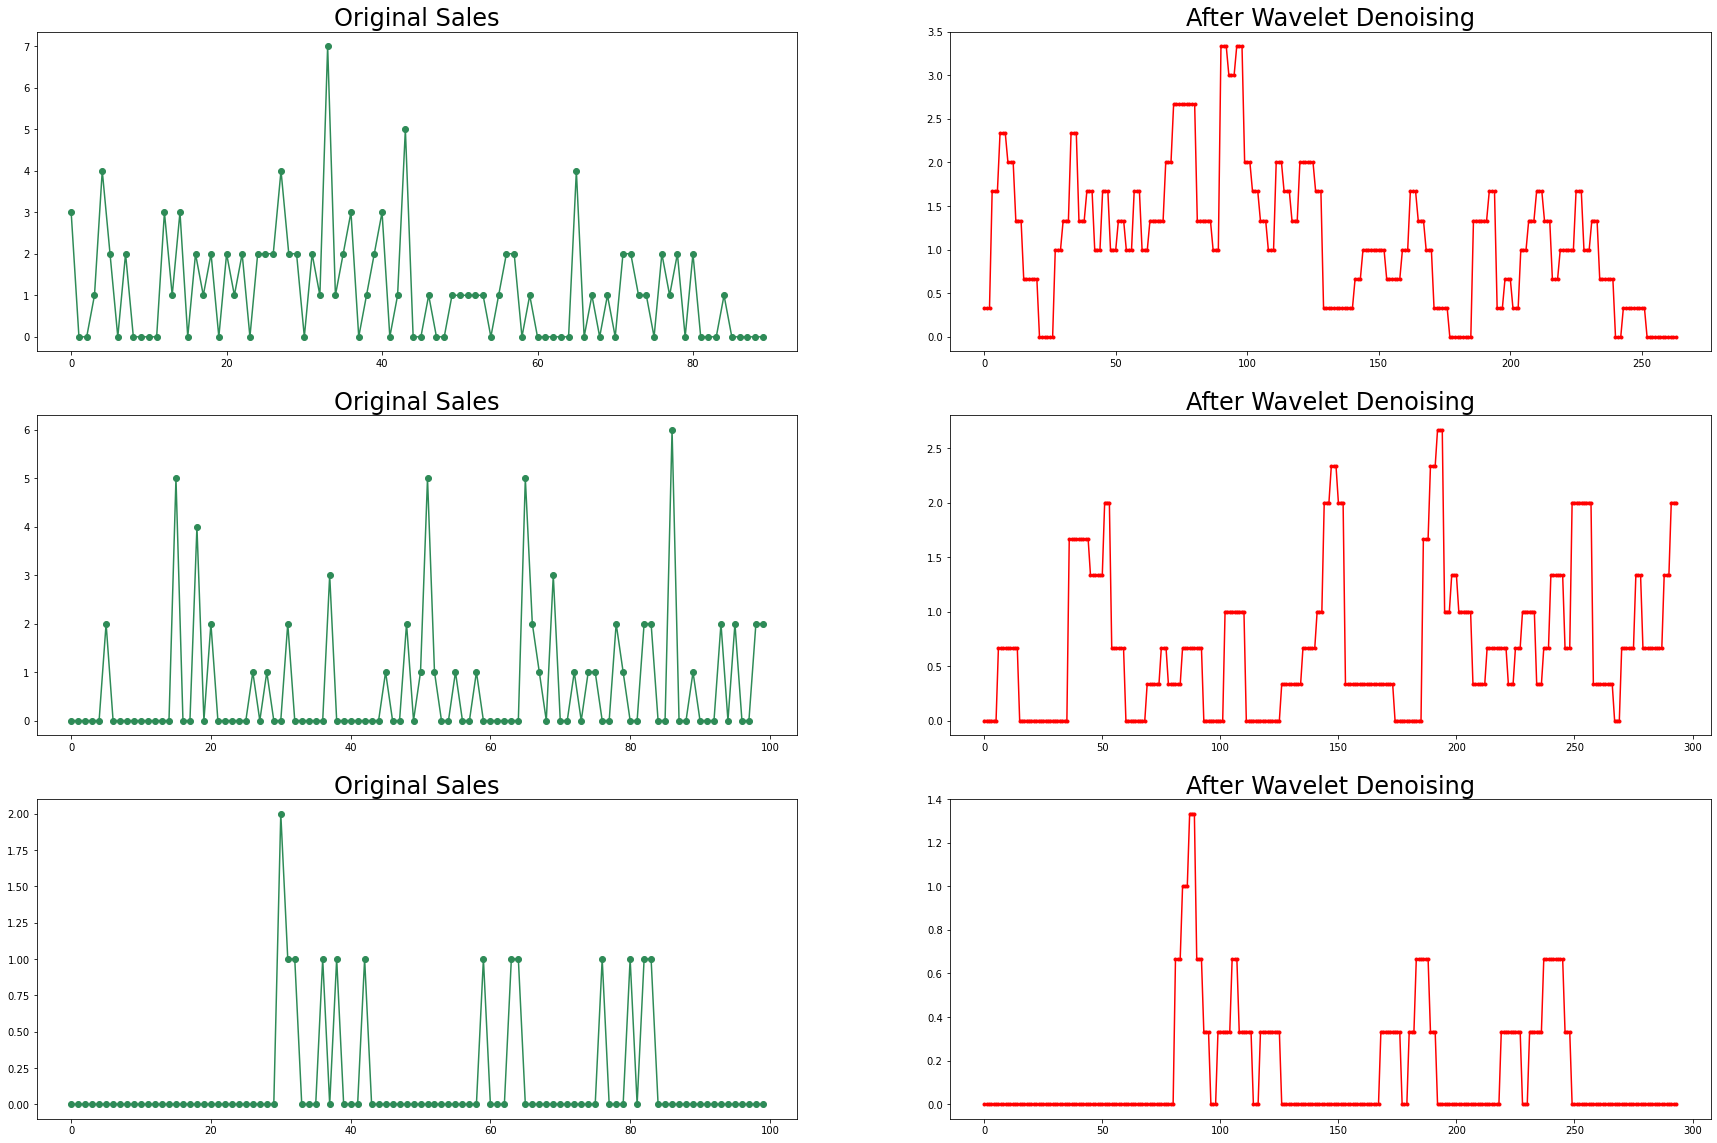

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))

ax[0, 0].plot(x_1, color='seagreen', marker='o') 
ax[0, 0].set_title('Original Sales', fontsize=24)
ax[0, 1].plot(y_a1, color='red', marker='.') 
ax[0, 1].set_title('After Wavelet Denoising', fontsize=24)

ax[1, 0].plot(x_2, color='seagreen', marker='o') 
ax[1, 0].set_title('Original Sales', fontsize=24)
ax[1, 1].plot(y_a2, color='red', marker='.') 
ax[1, 1].set_title('After Wavelet Denoising', fontsize=24)

ax[2, 0].plot(x_3, color='seagreen', marker='o') 
ax[2, 0].set_title('Original Sales', fontsize=24)
ax[2, 1].plot(y_a3, color='red', marker='.') 
ax[2, 1].set_title('After Wavelet Denoising', fontsize=24)

plt.show()

In [23]:
past_sales = df_sales_train_validation.set_index('id')[d_cols] \
    .T \
    .merge(df_calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

store_list = df_sell_prices['store_id'].unique()
means = []
fig = go.Figure()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    means.append(np.mean(past_sales[store_items].sum(axis=1)))
    fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (per store)")

In [24]:

for i, s in enumerate(store_list):
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Box(x=[s]*len(data), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Store name ")

In [25]:
df = pd.DataFrame(np.transpose([means, store_list]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name")

##California Store

In [26]:
greens = ["mediumaquamarine", "mediumseagreen", "seagreen", "green"]
store_list = df_sell_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "ca" in s or "CA" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s, marker=dict(color=greens[i])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (California)")

In [27]:
fig = go.Figure()

for i, s in enumerate(store_list):
    if "ca" in s or "CA" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Box(x=[s]*len(data), y=data, name=s, marker=dict(color=greens[i])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Store name (California)")

In [28]:
df = pd.DataFrame(np.transpose([means, stores]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name", color_continuous_scale=greens)


fig = go.Figure(data=[
    go.Bar(name='', x=stores, y=means, marker={'color' : greens})])

fig.update_layout(title="Mean sales vs. Store name (California)", yaxis=dict(title="Mean sales"), xaxis=dict(title="Store name"))
fig.update_layout(barmode='group')
fig.show()

##Wisconsin Store

In [29]:
purples = ["thistle", "violet", "purple", "indigo"]
store_list = df_sell_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "wi" in s or "WI" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s, marker=dict(color=purples[i%len(purples)])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (Wisconsin)")

In [30]:
fig = go.Figure()

for i, s in enumerate(store_list):
    if "wi" in s or "WI" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Box(x=[s]*len(data), y=data, name=s, marker=dict(color=purples[i%len(purples)])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Store name (Wisconsin)")

In [31]:
df = pd.DataFrame(np.transpose([means, stores]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name", color_continuous_scale=greens)


fig = go.Figure(data=[
    go.Bar(name='', x=stores, y=means, marker={'color' : purples})])

fig.update_layout(title="Mean sales vs. Store name (Wisconsin)", yaxis=dict(title="Mean sales"), xaxis=dict(title="Store name"))
fig.update_layout(barmode='group')
fig.show()

##Texas Store

In [32]:
blues = ["skyblue", "dodgerblue", "darkblue"]
store_list = df_sell_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "tx" in s or "TX" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s, marker=dict(color=blues[i%len(blues)])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (Texas)")

In [33]:
fig = go.Figure()

for i, s in enumerate(store_list):
    if "tx" in s or "TX" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Box(x=[s]*len(data), y=data, name=s, marker=dict(color=blues[i%len(blues)])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Store name (Texas)")

In [34]:
df = pd.DataFrame(np.transpose([means, stores]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name", color_continuous_scale=greens)


fig = go.Figure(data=[
    go.Bar(name='', x=stores, y=means, marker={'color' : blues})])

fig.update_layout(title="Mean sales vs. Store name (Texas)", yaxis=dict(title="Mean sales"), xaxis=dict(title="Store name"))
fig.update_layout(barmode='group')
fig.show()